In [1]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__) 

     |████████████████████████████████| 87.9MB 68kB/s 
     |████████████████████████████████| 501kB 63.4MB/s 
     |████████████████████████████████| 3.1MB 62.0MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2020-09-20 15:29:45--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-09-20 15:29:46 (36.8 MB/s) - ‘moore.csv’ saved [2302/2302]



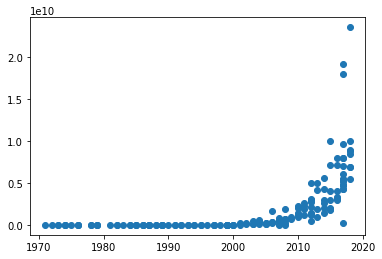

In [3]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1)
Y = data[:,1]
plt.scatter(X,Y)

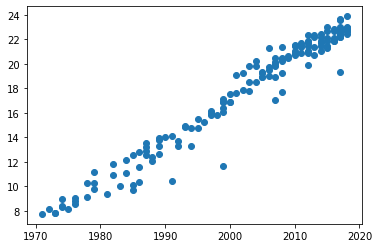

In [4]:
Y = np.log(Y)
plt.scatter(X,Y)

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 383us/sample - loss: 317.6816
Epoch 2/200
162/162 [==============================] - 0s 53us/sample - loss: 318.4054
Epoch 3/200
162/162 [==============================] - 0s 50us/sample - loss: 309.0130
Epoch 4/200
162/162 [==============================] - 0s 43us/sample - loss: 305.2770
Epoch 5/200
162/162 [==============================] - 0s 44us/sample - loss: 296.4155
Epoch 6/200
162/162 [==============================] - 0s 66us/sample - loss: 288.2833
Epoch 7/200
162/162 [==============================] - 0s 54us/sample - loss: 290.0948
Epoch 8/200
162/162 [==============================] - 0s 52us/sample - loss: 282.8490
Epoch 9/200
162/162 [==============================] - 0s 49us/sample - loss: 272.4125
Epoch 10/200
162/162 [==============================] - 0s 53us/sample - loss: 263.9957
Epoch 11/200
162/162 [==============================] - 0s 52us/sample - loss: 263.6451
Epoch 12/200
162/16

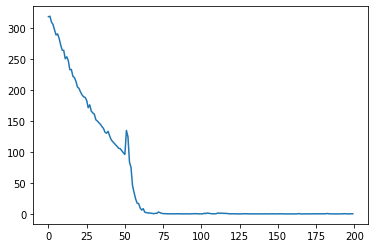

In [5]:
X= X-X.mean()
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)                                    
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
     return 0.001
  return 0.0001 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r= model.fit(X, Y, epochs=200, callbacks=[scheduler])
plt. plot(r.history['loss'], label='loss')

In [8]:
print(model.layers)
print(model.layers[0].get_weights()[0][0,0])
a = model.layers[0].get_weights()[0][0,0]
print(np.log(2)/a)

0.3793272
1.8273067850134224


In [9]:
P = model.predict(X)
print(P)

[[ 5.92964  ]
 [ 6.3089666]
 [ 6.6882944]
 [ 6.6882944]
 [ 7.067621 ]
 [ 7.067621 ]
 [ 7.067621 ]
 [ 7.446949 ]
 [ 7.826276 ]
 [ 7.826276 ]
 [ 7.826276 ]
 [ 8.58493  ]
 [ 8.58493  ]
 [ 8.964257 ]
 [ 8.964257 ]
 [ 8.964257 ]
 [ 9.722912 ]
 [10.10224  ]
 [10.10224  ]
 [10.481566 ]
 [10.860893 ]
 [10.860893 ]
 [11.240221 ]
 [11.240221 ]
 [11.240221 ]
 [11.619548 ]
 [11.619548 ]
 [11.619548 ]
 [11.998875 ]
 [11.998875 ]
 [11.998875 ]
 [11.998875 ]
 [12.378202 ]
 [12.378202 ]
 [12.757529 ]
 [12.757529 ]
 [12.757529 ]
 [12.757529 ]
 [13.136856 ]
 [13.516184 ]
 [13.516184 ]
 [13.895512 ]
 [13.895512 ]
 [14.274838 ]
 [14.274838 ]
 [14.654165 ]
 [14.654165 ]
 [15.033493 ]
 [16.550802 ]
 [15.033493 ]
 [15.41282  ]
 [15.792147 ]
 [15.792147 ]
 [15.792147 ]
 [16.171474 ]
 [16.550802 ]
 [16.550802 ]
 [16.930128 ]
 [16.930128 ]
 [16.550802 ]
 [16.550802 ]
 [16.550802 ]
 [16.930128 ]
 [17.309456 ]
 [17.309456 ]
 [17.688784 ]
 [18.447437 ]
 [18.447437 ]
 [18.826765 ]
 [19.206093 ]
 [18.826765 ]
 [19.2

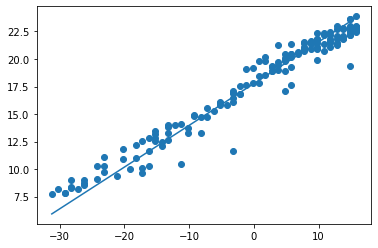

In [11]:
yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,yhat)

In [12]:
w, d = model.layers[0].get_weights()
X = X.reshape(-1,1)
Yhat2 = (X.dot(w)+d).flatten()
np.allclose(yhat, Yhat2)

True